In [1]:
import pandas as pd


In [2]:
## Data Ingestion
df = pd.read_csv("cubic_zirconia.csv")

df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [3]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [4]:
df.shape

(26967, 11)

In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df["depth"] = df["depth"].fillna(df["depth"].mean())

In [7]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

### No missing data observed

## Unnamed is a unique value column, so we should drop it

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [10]:
## Check for duplicated records

df.duplicated().sum()

34

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(26933, 10)

### Segregating categorical variables and numerical variables

In [14]:
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

num_features = [feature for feature in df.columns if feature not in cat_features]

In [15]:
df[cat_features]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [16]:
df[num_features]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


In [17]:
df[cat_features].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [18]:
print(df["cut"].nunique())
print(df["cut"].unique())

5
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


In [19]:
df["cut"].value_counts()

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [20]:
df["color"].value_counts()


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [21]:
df["clarity"].value_counts()


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64

### Plotting all numerical features in a histogram plot

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


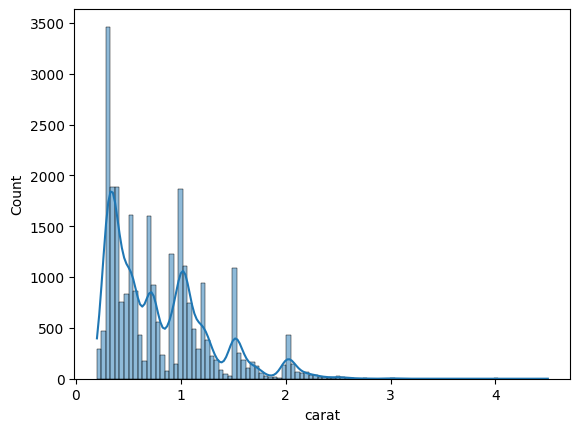

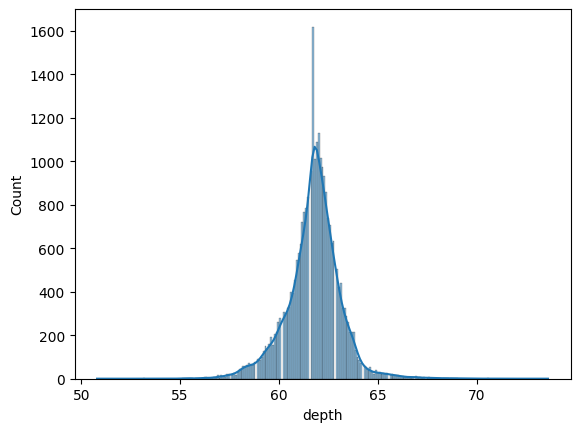

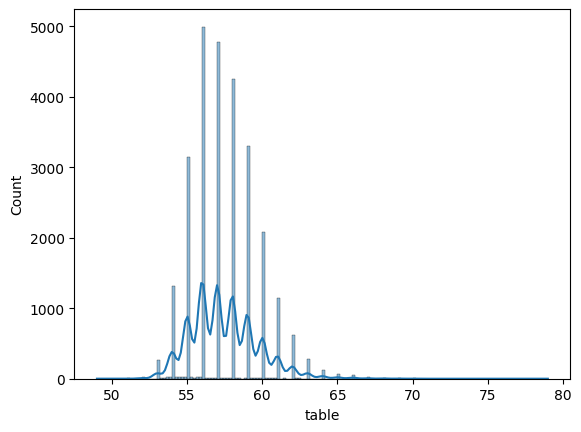

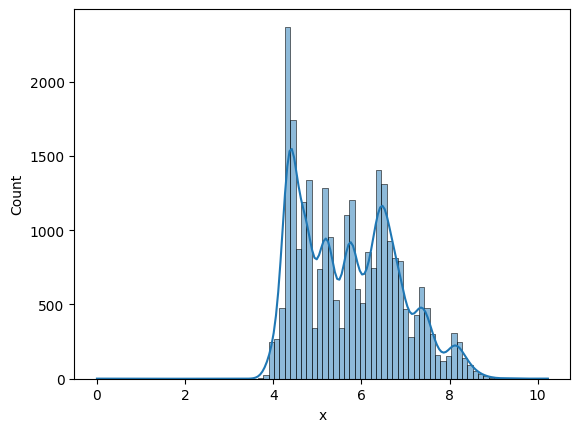

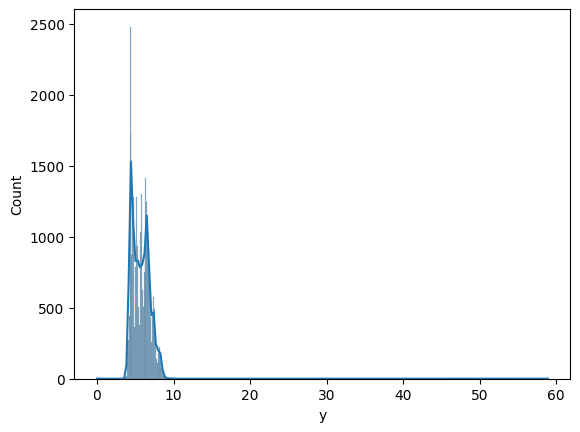

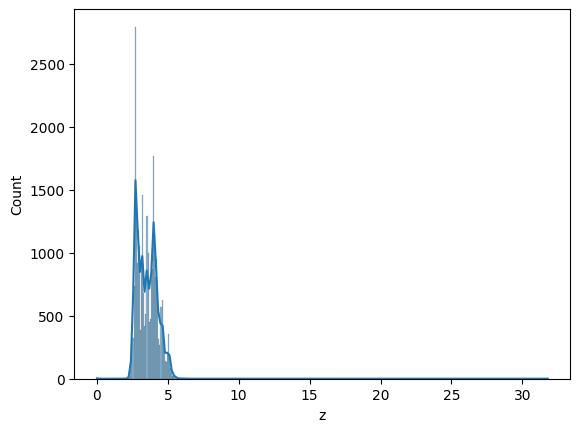

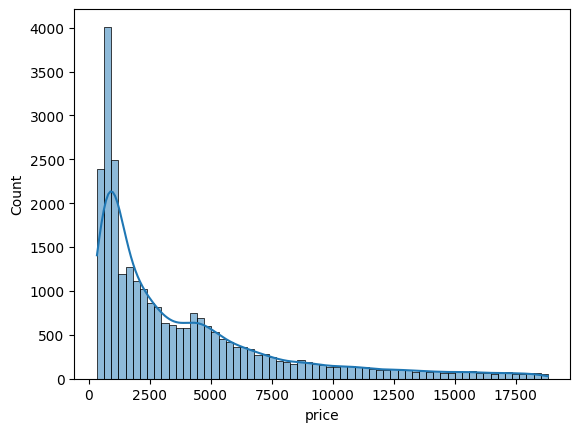

In [23]:
for x in num_features:
    sns.histplot(data=df, x=x, kde=True)
    print("\n")
    plt.show()

### For categorical feature plots

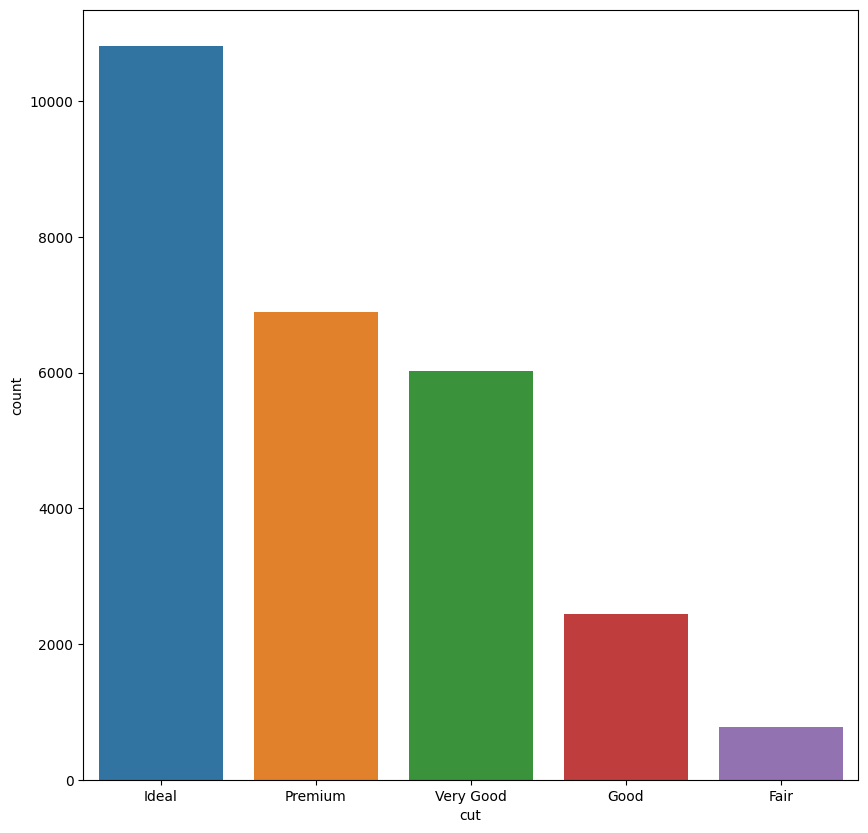

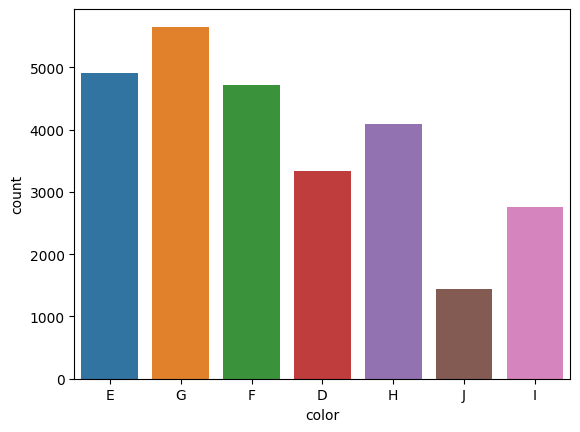

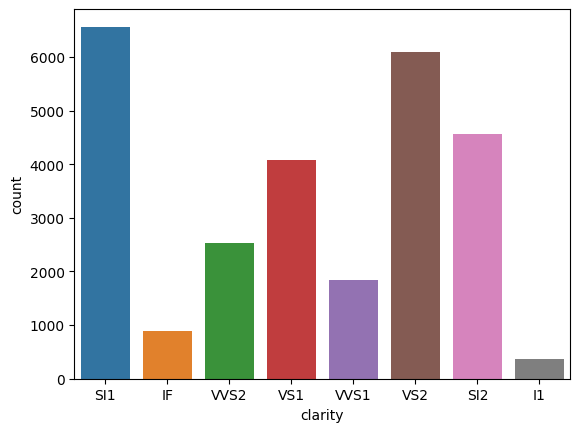

In [24]:
plt.figure(figsize=(10,10))
for i in cat_features:
    sns.countplot(data=df, x=i)
    print("\n")
    plt.show()

<Axes: >

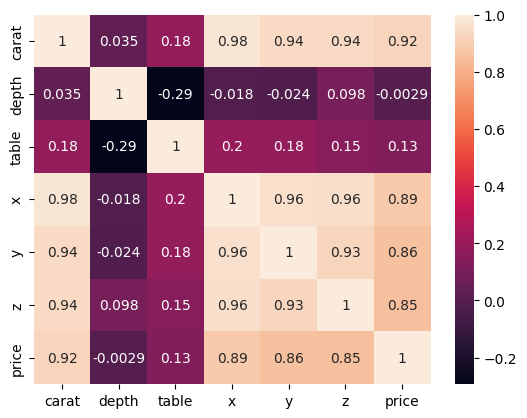

In [25]:
### Correlation

sns.heatmap(df[num_features].corr(), annot=True)

/Users/macbookpro/Downloads/House Price/env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


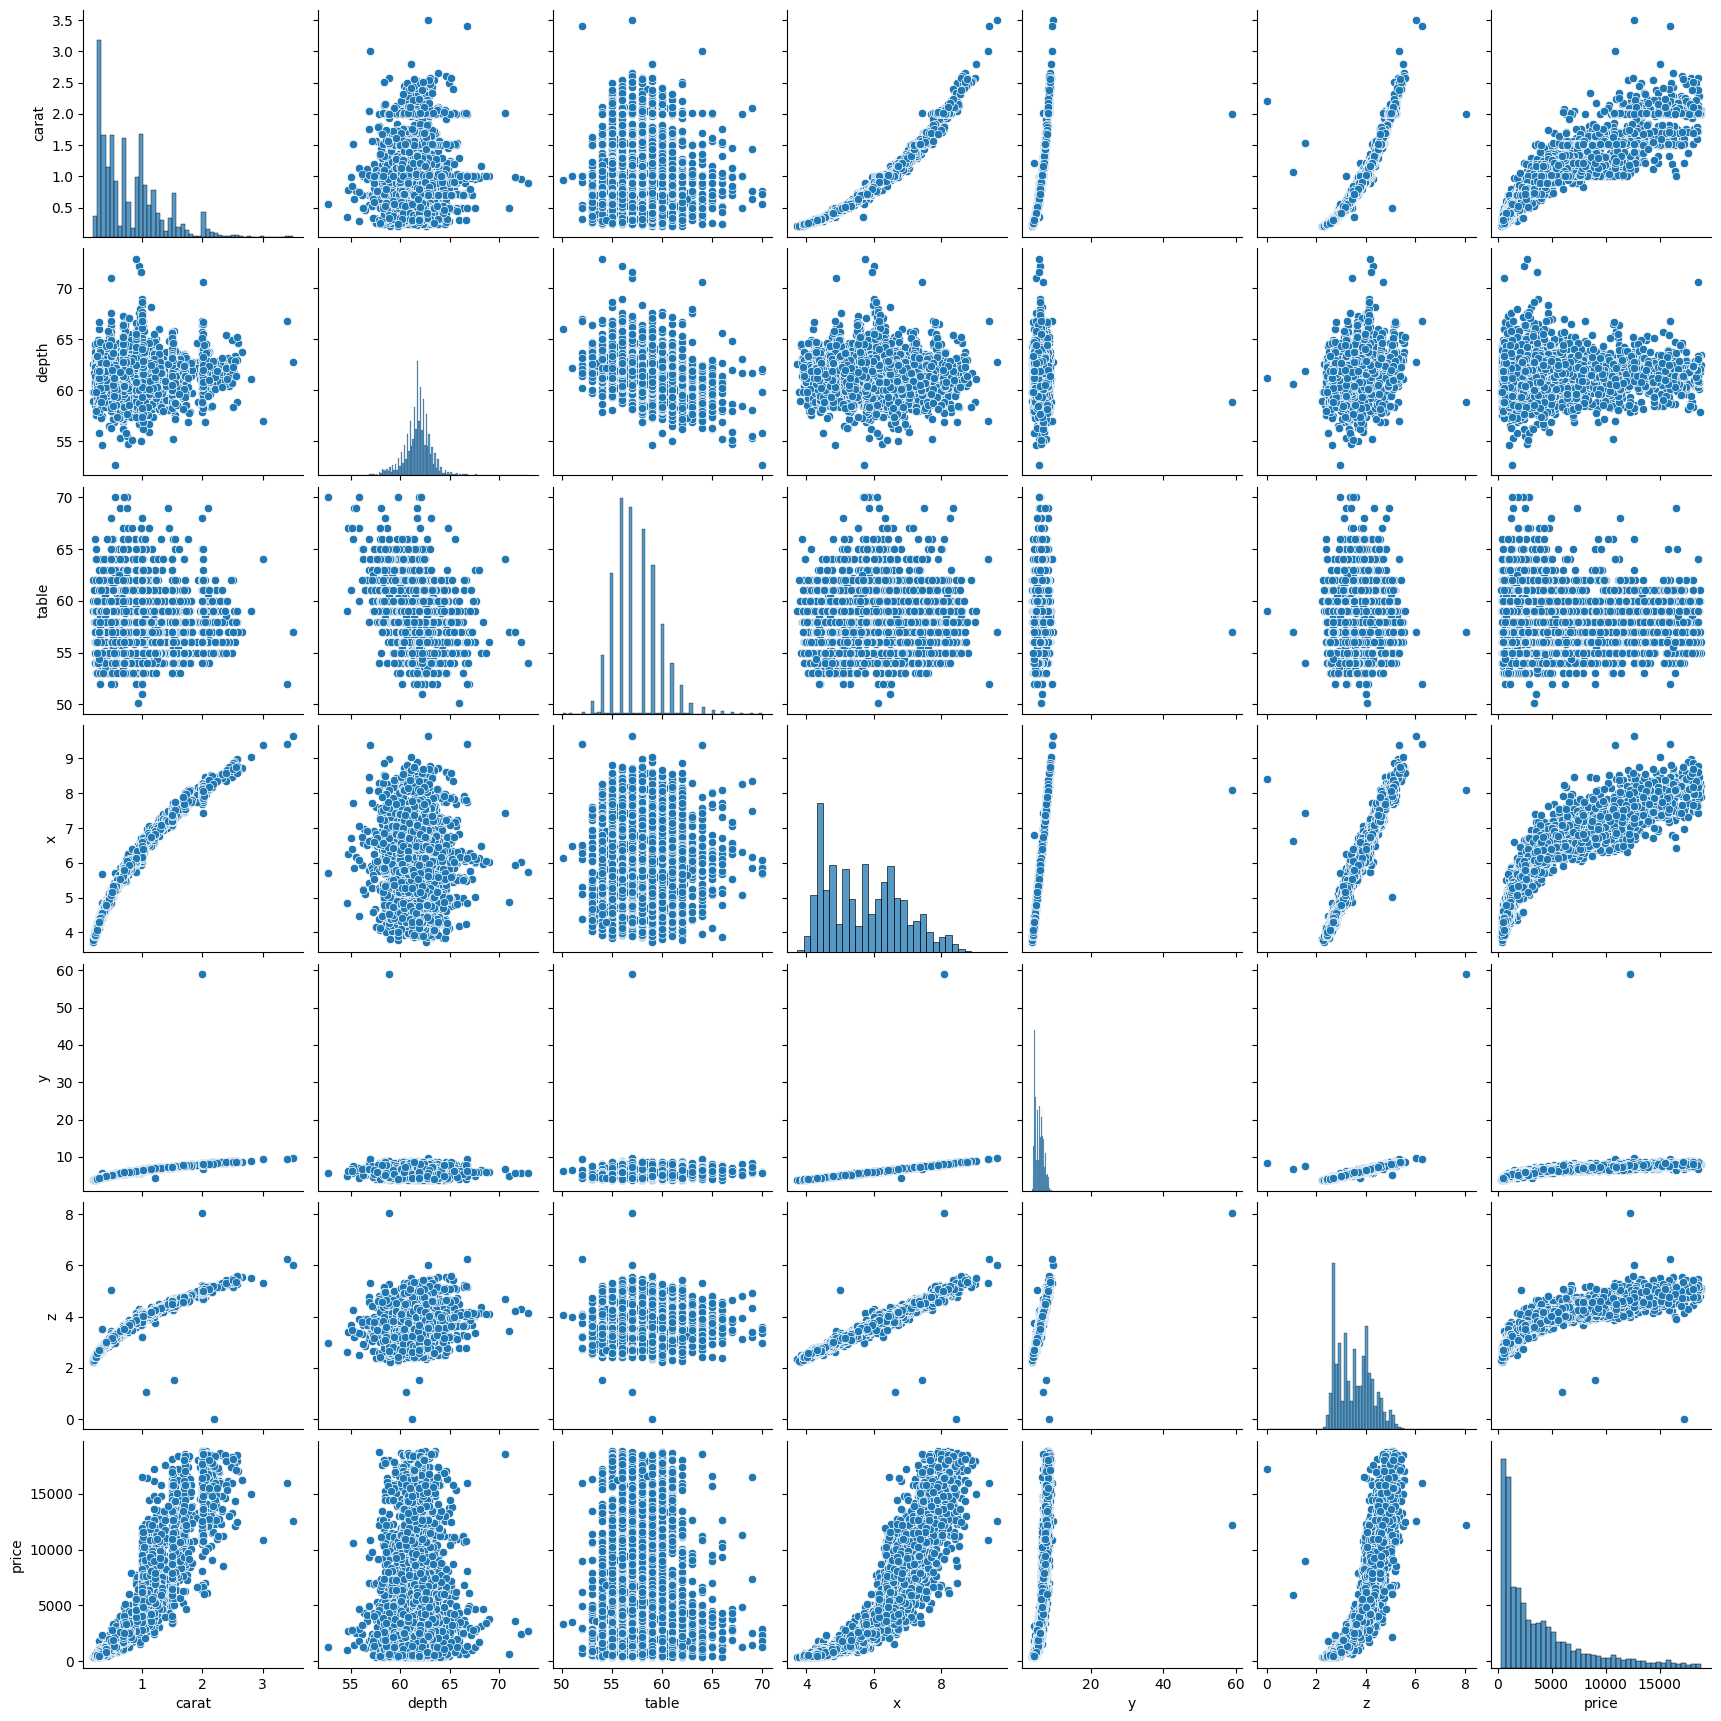

In [26]:
df_copy = df.sample(frac=0.25)

sns.pairplot(data=df_copy)

In [27]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [28]:
df["cut"] = df["cut"].map({"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}).astype("int")

In [29]:
df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289


In [30]:
df.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

### you can use the following link to get the grading

www.americangemsociety.org/ags-diamond-grading-system

In [31]:
df["clarity"] = df["clarity"].map({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}).astype("int")

In [32]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,8,60.8,58.0,4.42,4.46,2.70,984


In [33]:
df["color"].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [34]:
df["color"] = df["color"].map({"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}).astype("float")

In [35]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2.0,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4.0,8,60.8,58.0,4.42,4.46,2.70,984
